# Intrinsic optical imaging results

In [1]:
import Inflow
Inflow.logging.enable_logging(level = "INFO")
import one
from ResearchProjects import adaptation
from ResearchProjects.adaptation import aliases as alias
import pImage
import matplotlib.pyplot as plt, pandas as pd, numpy as np, os
logger = Inflow.logging.get_local_logger("main")
import logging
import time

# Load Data 

In [2]:
cnx = one.ONE(data_access_mode = "remote", mode = "remote", regen = True)
cnx.alyx.delete_cache()

In [8]:
session = cnx.search("wm34/2023-10-17/002", details = True, no_cache = True).iloc[0] # get most recent
session

subject                                                                      wm34
users                                                                [wilsonmena]
location                                                 Fernbach - 2p stim setup
procedures                                            [Intrinsic optical imaging]
lab                                                                      HaissLab
projects                                                             [Adaptation]
type                                                                         None
task_protocol                                                                    
number                                                                          2
start_time                                                    2023-10-17T14:40:33
end_time                                                                     None
narrative                       Vgat#31 / wm34\r\nintrinsic optical imaging\r\...
parent_session  

In [9]:
datas = adaptation.pipelines.generate_processed_IOI(session_details = session)
reference = adaptation.intrinsic_imaging.get_reference(session)

LOAD_INFO  : load_pipeline                : <s#wm34/2023-10-17/002> Could not find or load processed_IOI saved file.
LOAD_INFO  : load_pipeline                : <s#wm34/2023-10-17/002> Performing the computation to generate processed_IOI. Hold tight.
SAVE_INFO  : preprocessed_data            : <s#wm34/2023-10-17/002> Saving processed processed_IOI data at \\cajal\cajal_data2\ONE\Adaptation\wm34\2023-10-17\002\preprocessing_saves\preproc_data.processed_IOI.pickle 


In [7]:
datas["B1"] = adaptation.intrinsic_imaging.calculation(datas["B1"], include = [7,8,18], use_difference = False)

# Edit points if necessary

In [11]:
val = adaptation.interactive.evaluate_IOI_results(datas)

interactive(children=(FloatSlider(value=-0.001, description='vmin', max=-0.0005, min=-0.002, step=0.0001), Flo…

# Make plots 

B1
Beta


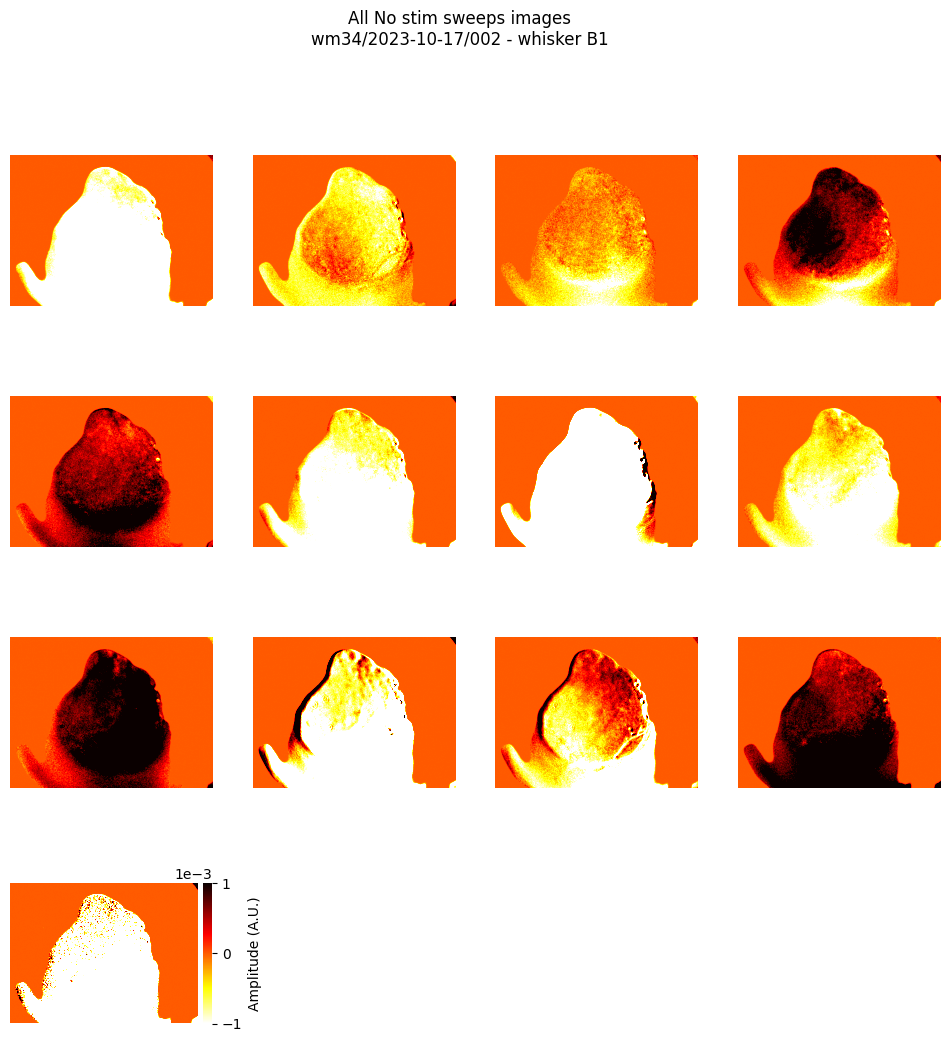

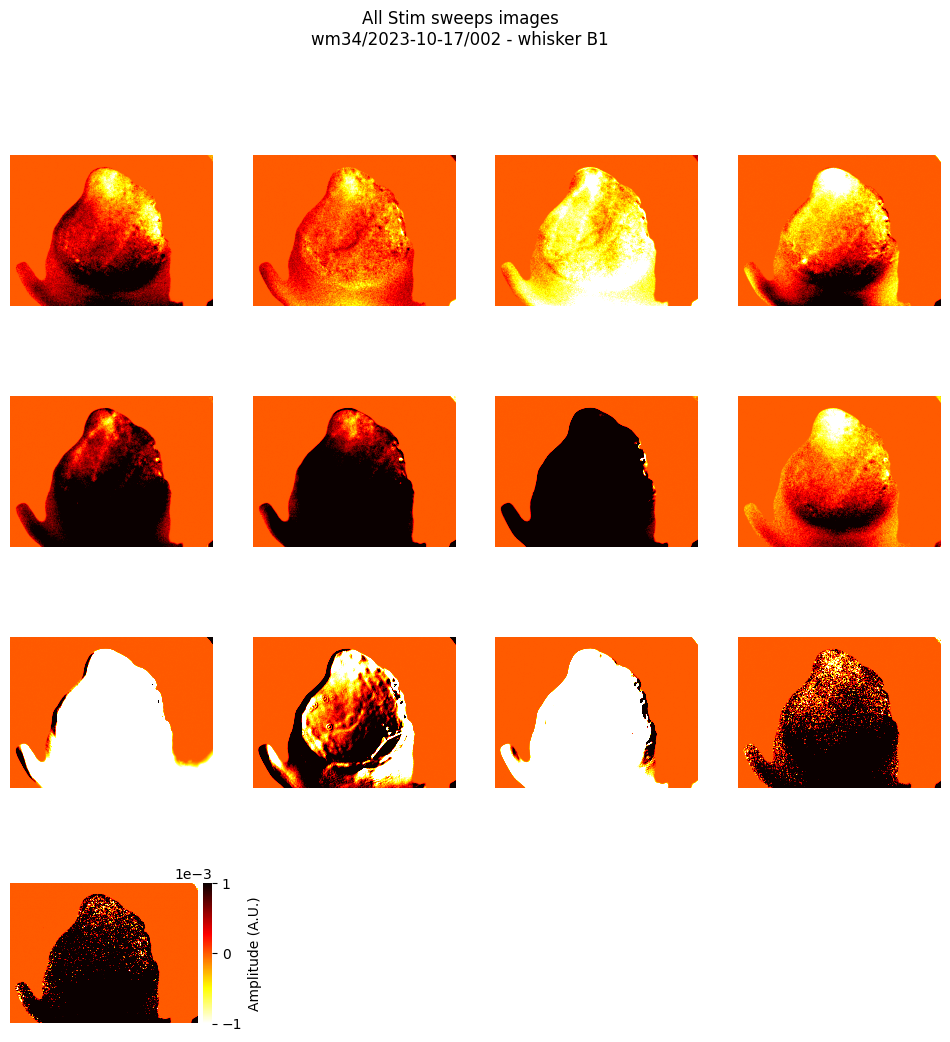

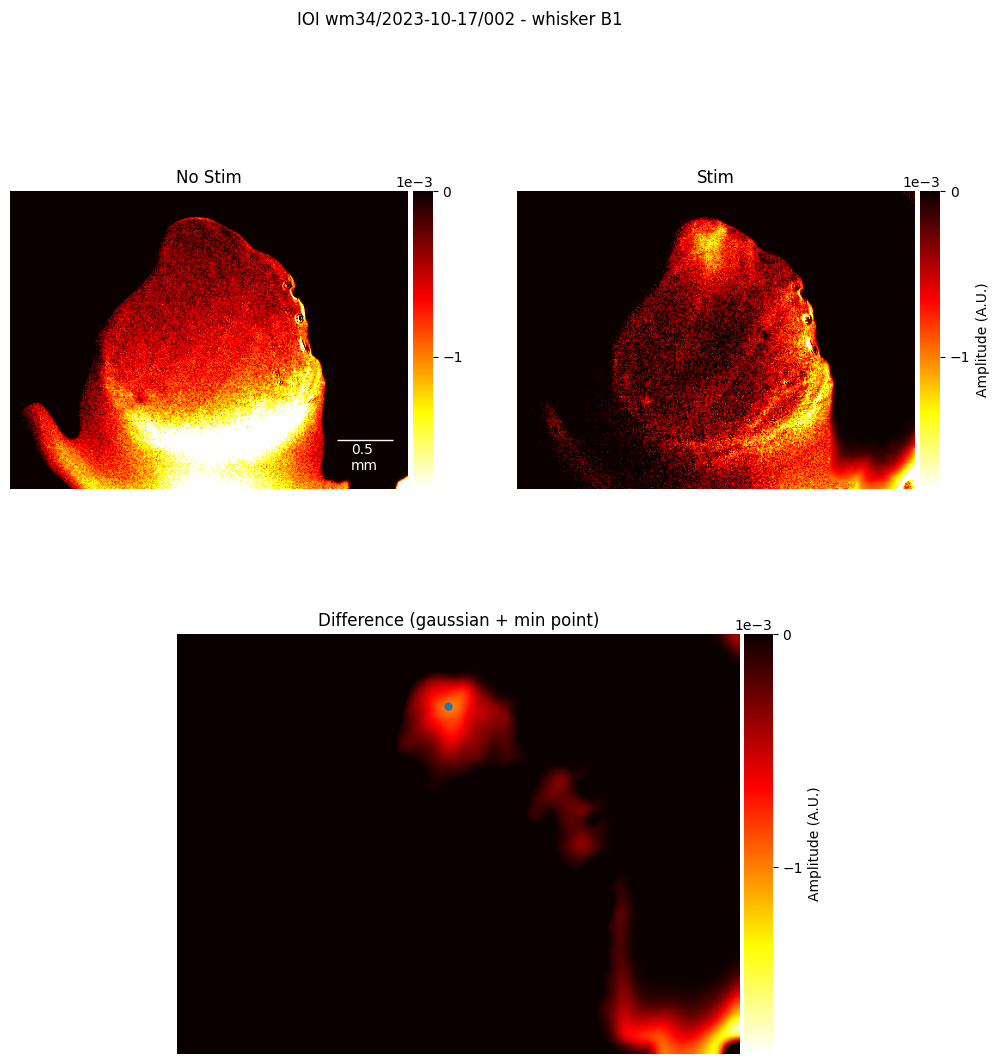

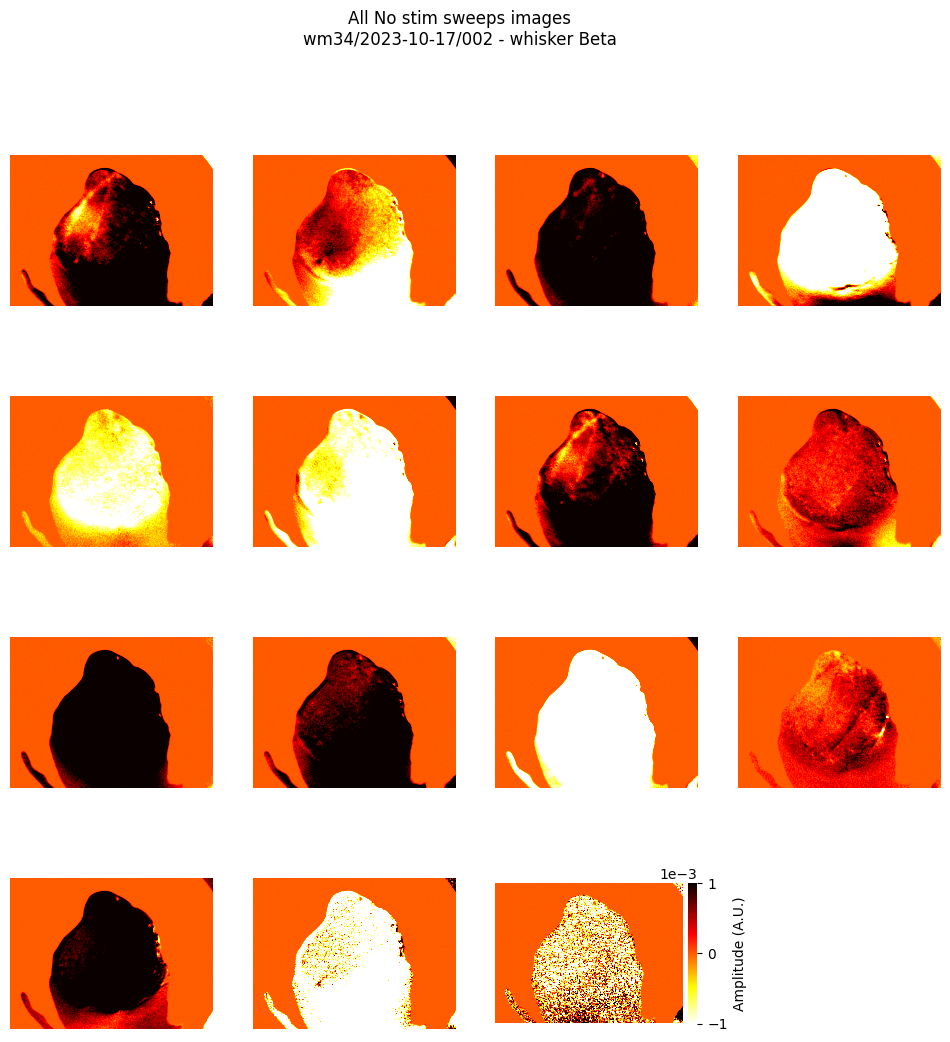

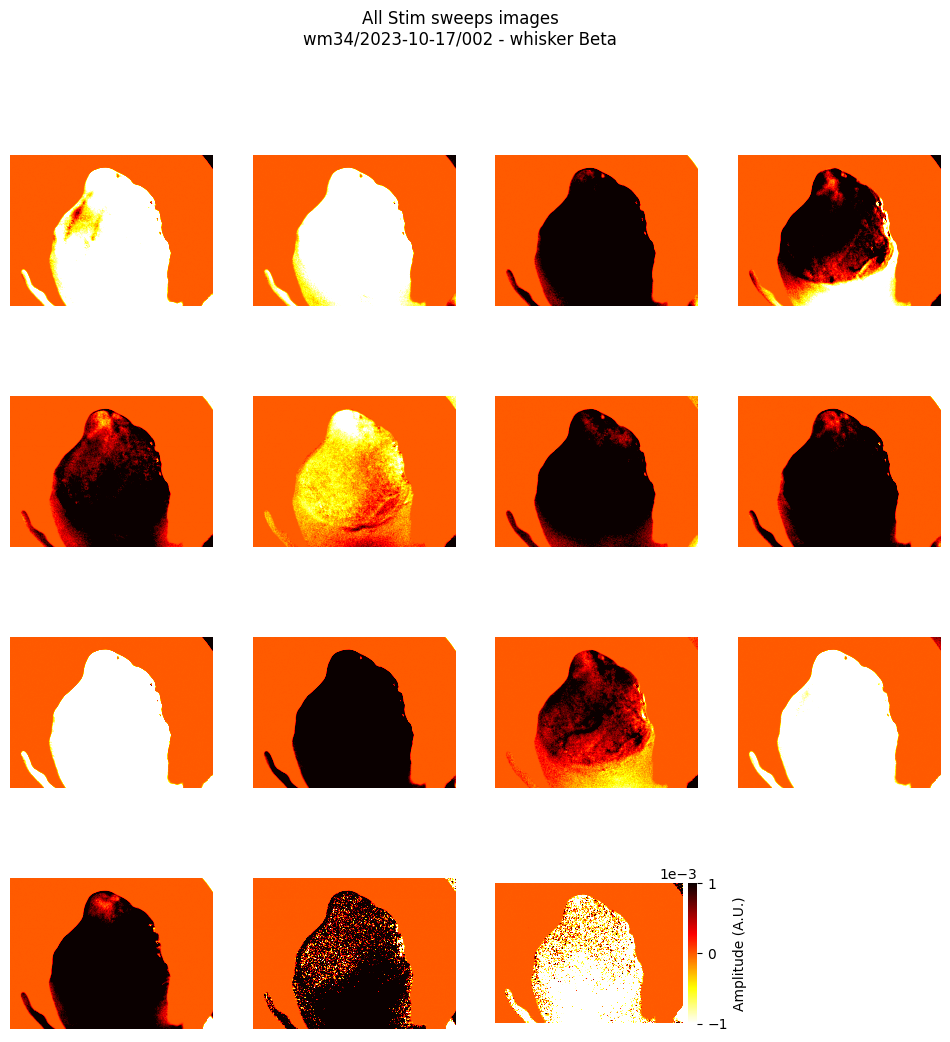

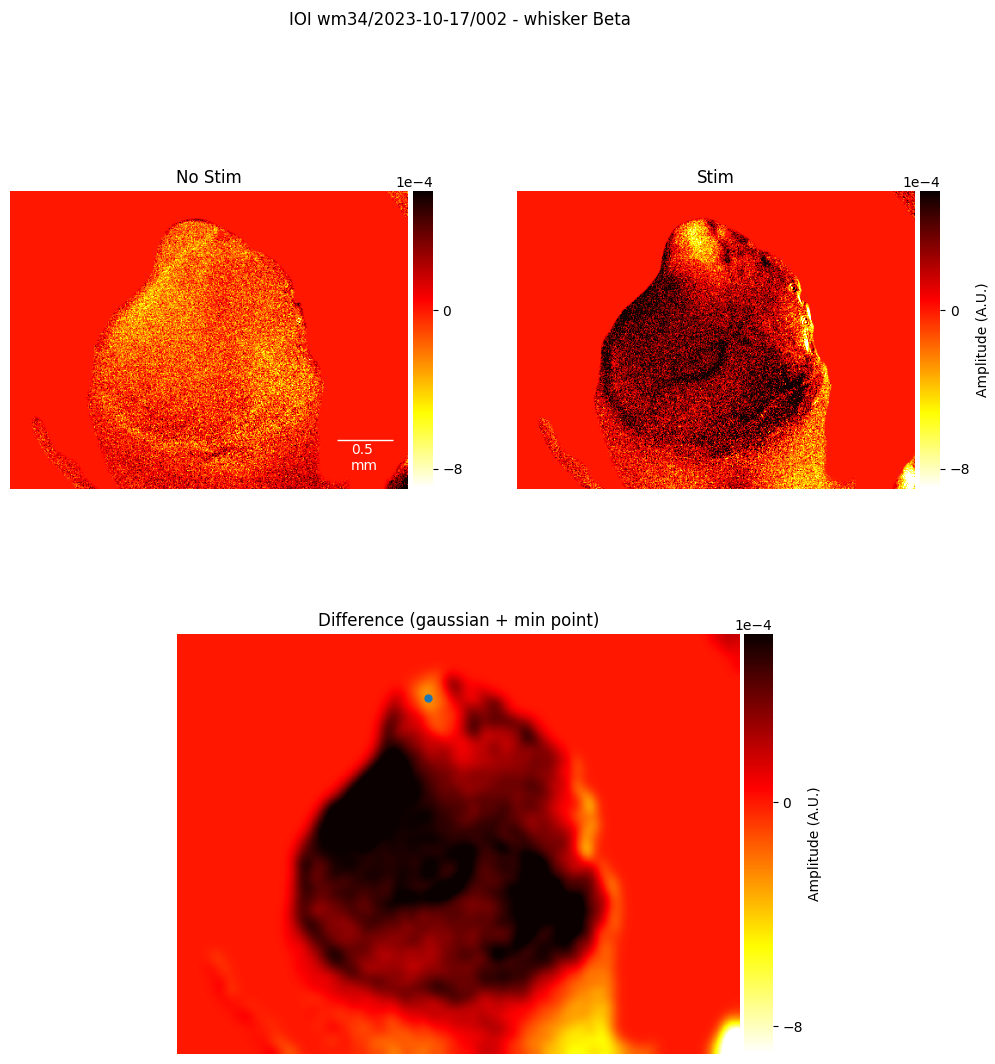

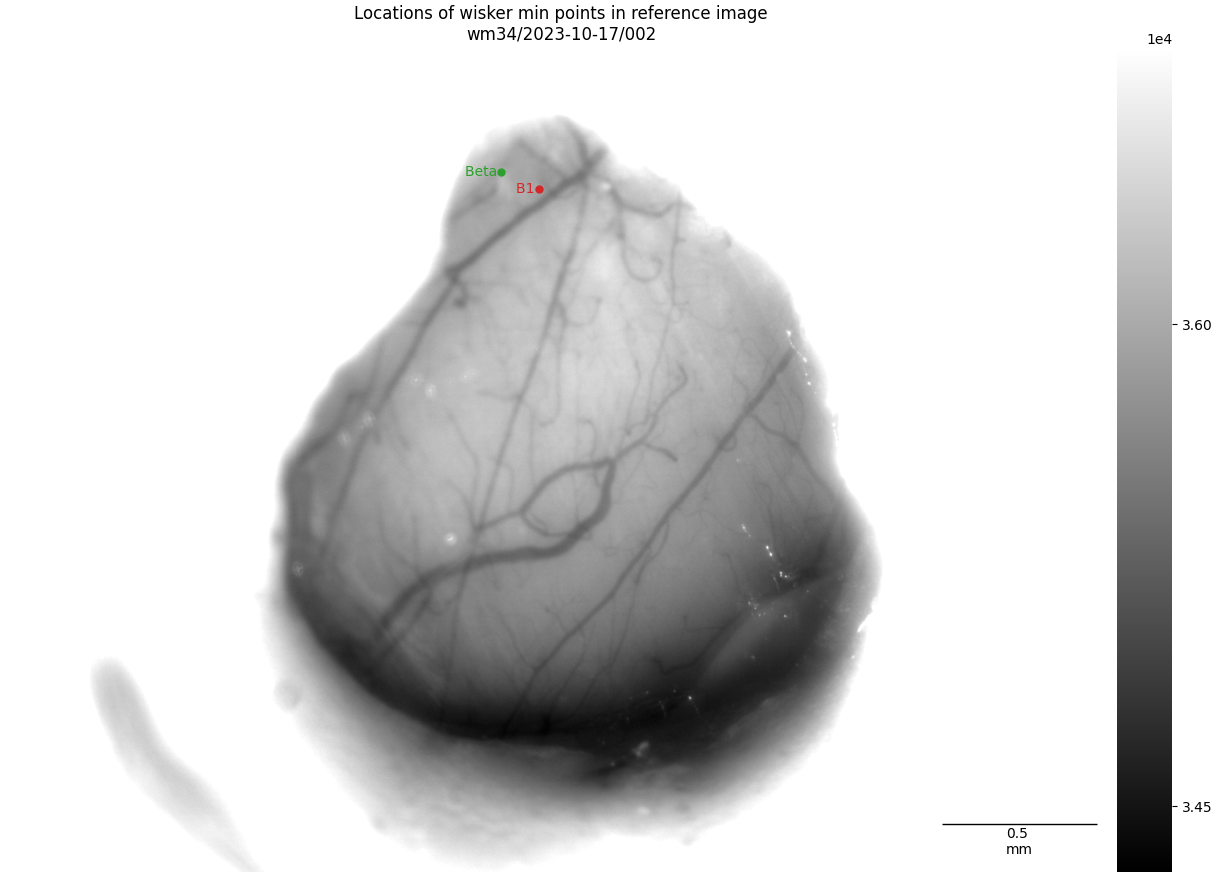

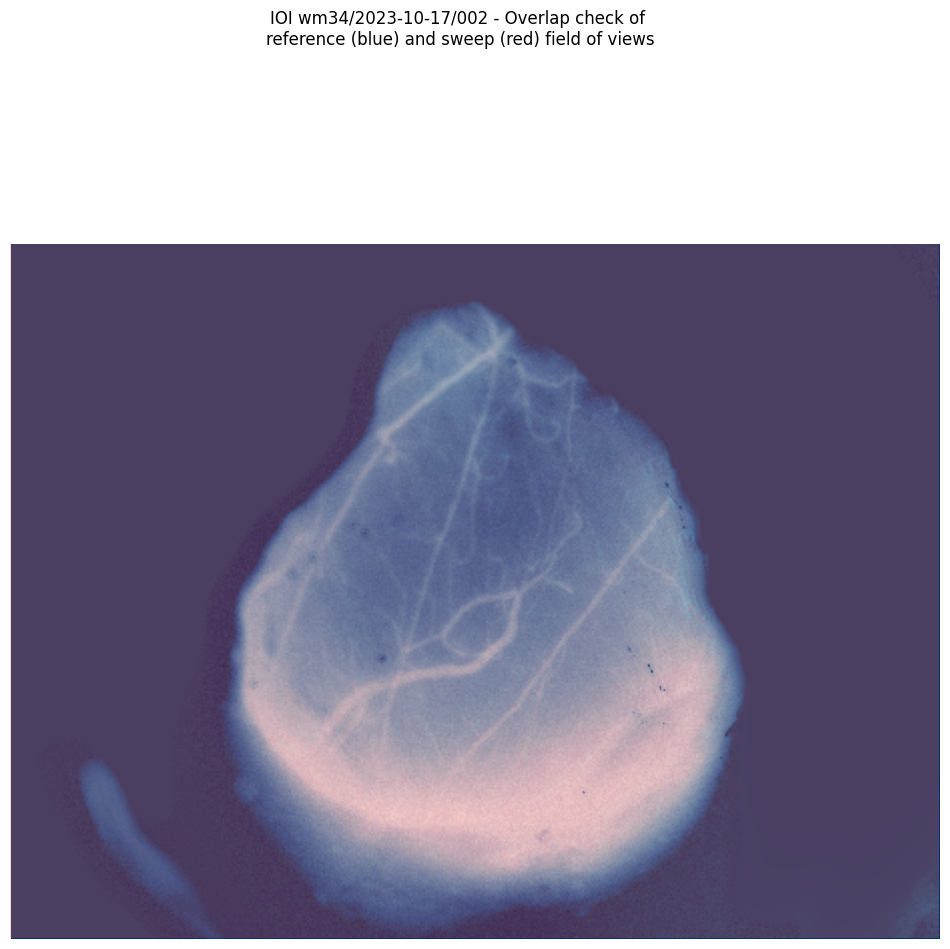

In [12]:
for whisker in datas.keys() : 
    print(whisker)
    IOI_data = datas[whisker] 
    
    adaptation.plots.IOI_single_wisker_all_sweeps(IOI_data["nostims"], whisker, session_details = session, label = "No stim")
    adaptation.plots.IOI_single_wisker_all_sweeps(IOI_data["stims"], whisker, session_details = session, label = "Stim")  
    adaptation.plots.IOI_single_wisker_average(IOI_data, whisker, session)

adaptation.plots.IOI_multi_whisker_reference(datas, reference, session)
adaptation.plots.IOI_overlap_check_plot(datas, reference, session)

In [13]:
datas = adaptation.pipelines.save_processed_IOI(datas, session)
#Inflow.save.preprocessed_data(datas, session_details = session, alf_identifier = "processed_IOI")

SAVE_INFO  : preprocessed_data            : Saving processed processed_IOI data at \\cajal\cajal_data2\ONE\Adaptation\wm34\2023-10-17\002\preprocessing_saves\preproc_data.processed_IOI.pickle (overwriting)
